In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
housing = pd.read_csv('/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.shape

(20640, 10)

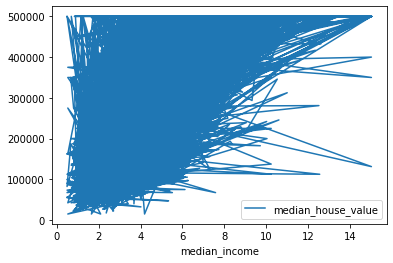

In [8]:
housing.plot("median_income", "median_house_value")

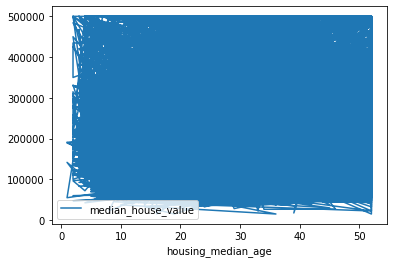

In [9]:
housing.plot("housing_median_age", "median_house_value")

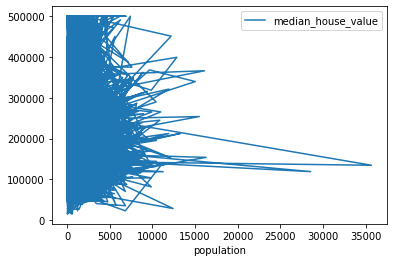

In [10]:
housing.plot("population", "median_house_value")

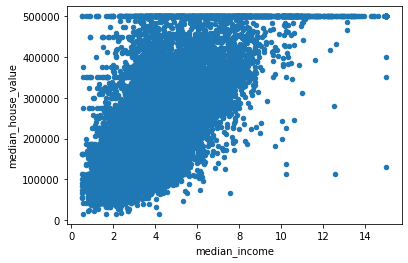

In [11]:
housing.plot.scatter("median_income", "median_house_value")

In [12]:
x_train, x_test, y_train, y_test = train_test_split(housing.median_income, housing.median_house_value, test_size = 0.2)

In [13]:
regr = LinearRegression()

In [14]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [15]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [16]:
preds

array([196565.33646481, 127445.18306703, 148312.35586989, ...,
       296866.85247485, 204307.26285302, 269598.34659776])

In [17]:
y_test.head()

19780     90400.0
20355    162500.0
3751     200000.0
15835    383700.0
3975     244800.0
Name: median_house_value, dtype: float64

In [18]:
residuals = preds - y_test

(array([   5.,   27.,   61.,  131.,  301.,  683., 1528., 1249.,  137.,
           6.]), array([-426120.89853452, -359261.38345788, -292401.86838124,
        -225542.3533046 , -158682.83822796,  -91823.32315132,
         -24963.80807468,   41895.70700195,  108755.22207859,
         175614.73715523,  242474.25223187]), <a list of 10 Patch objects>)

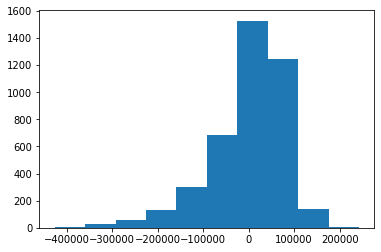

In [19]:
plt.hist(residuals)

In [20]:
mean_squared_error(y_test, preds) ** 0.5

82725.74816919795